In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [12]:
df = pd.read_csv("yRL172_mutants.csv")
df

,date,strain,number,dots,cells
0,121224,172,1,18,79
1,121224,172,1,10,63
2,121224,172,1,11,59
3,121224,172,2,14,53
4,121224,172,2,11,52
5,121224,172,2,5,39
6,121224,172,3,9,55
7,121224,172,3,9,55
8,121224,172,3,12,46
9,121224,1343,1,13,74


In [13]:
# calculate SE / cells (%)
df_number = df.groupby(["strain", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]
df_number

,strain,number,date,dots,cells,SE
0,172,1,363672,39,201,19.402985
1,172,2,363672,30,144,20.833333
2,172,3,363672,30,156,19.230769
3,1343,1,242448,17,124,13.709677
4,1343,2,242448,14,103,13.592233
5,1343,3,242448,22,134,16.417910
6,1364,1,242448,22,116,18.965517
7,1364,2,242448,24,134,17.910448
8,1364,3,242448,21,117,17.948718
9,1366,1,242448,7,177,3.954802


In [14]:
# calculate average & sem of SE number in different mutants
# WT, atg21D, hsv2D, vps26D
SE_mean = df_number.groupby("strain").mean()["SE"].values
SE_sem = df_number.groupby("strain").std()["SE"].values / np.sqrt(3)
print(SE_mean)
print(SE_sem)

[19.82236255 14.57327363 18.27489432  4.44099799]
[0.50792421 0.92294132 0.34548814 1.59098664]


## Welth's t-test collected with Holm-sidak

In [15]:
WT_SE = df_number[df_number["strain"] == 172]["SE"]
atg21_SE = df_number[df_number["strain"] == 1343]["SE"]
hsv2_SE = df_number[df_number["strain"] == 1364]["SE"]
vps26_SE = df_number[df_number["strain"] == 1366]["SE"]

In [16]:
statistic, atg21_pvalue = stats.ttest_ind(WT_SE, atg21_SE, equal_var=False)
atg21_pvalue

0.014260285532985513

In [17]:
statistic, hsv2_pvalue = stats.ttest_ind(WT_SE, hsv2_SE, equal_var=False)
hsv2_pvalue

0.07379831490853767

In [18]:
statistic, vps26_pvalue = stats.ttest_ind(WT_SE, vps26_SE, equal_var=False)
vps26_pvalue

0.006255703848176785

In [19]:
multipletests(pvals=[atg21_pvalue, hsv2_pvalue, vps26_pvalue], alpha=0.05, method="holm-sidak")

(array([ True, False,  True]),
 array([0.02831722, 0.07379831, 0.01864995]),
 0.016952427508441503,
 0.016666666666666666)

## PROPPIN mutants figure (WT, atg21D, hsv2D)

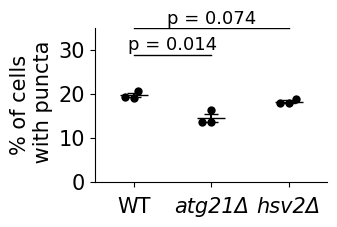

In [20]:
y = -7
fontsize=15
fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
sns.swarmplot(x="strain", y="SE", data=df_number.iloc[:9], size=6, color="black")
ax.errorbar(x=[0, 1, 2], y=SE_mean[0:3], yerr=SE_sem[0:3], capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')
# label of each strains
ax.text(0, y, "WT", ha="center", fontsize=fontsize)
ax.text(1, y, "atg21Δ", ha="center", fontstyle="italic", fontsize=fontsize)
ax.text(2, y, "hsv2Δ", ha="center", fontstyle="italic", fontsize=fontsize)
# frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot([0, 1], [29, 29], color='k', lw=1)
ax.text(0.5, 30, f'p = {atg21_pvalue:.3f}', ha='center', fontsize=fontsize-2)
ax.plot([0, 2], [35, 35], color='k', lw=1)
ax.text(1, 36, f'p = {hsv2_pvalue:.3f}', ha='center', fontsize=fontsize-2)

# x and y axis
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_ylim(0, 35)
ax.set_xlim(-0.5, 2.5)
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["0", "10", "20", "30"], fontsize=fontsize)
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")

fig.savefig("output.jpg", bbox_inches="tight")

## vps26 mutants figure (WT, vps26D)

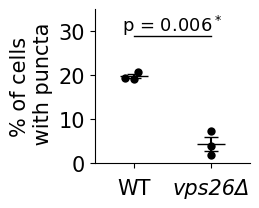

In [23]:
y = -7
fontsize=15

fig, ax = plt.subplots(figsize = (2, 2), dpi=100)
sns.swarmplot(x="strain", y="SE", data=pd.concat([df_number.iloc[:3], df_number.iloc[9:]], axis=0), size=6, color="black")
ax.errorbar(x=[0, 1], y=SE_mean[[0, 3]], yerr=SE_sem[[0, 3]], capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')
# label of each strains
ax.text(0, y, "WT", ha="center", fontsize=fontsize)
ax.text(1, y, "vps26Δ", ha="center", fontstyle="italic", fontsize=fontsize)

ax.plot([0, 1], [29, 29], color='k', lw=1)
ax.text(0.5, 30, f'p = {vps26_pvalue:.3f}$^*$', ha='center', fontsize=fontsize-2)
# frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x and y axis
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 35)
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["0", "10", "20", "30"], fontsize=fontsize)
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")

fig.savefig("output_vps26D.jpg", bbox_inches="tight")